# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation,
they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits
allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make
a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds
or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that 
have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Project Description

Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash
investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time,
or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements,
telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach
out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence,
it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the 
client data, you are also provided with the information of the call such as the duration of the call, day and month of the
call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
The classification goal of this dataset is to predict if the client or the customer of polish banking institution will
subscribe a term deposit product of the bank or not. 



You are provided with following 2 files:
    
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well 
    as the target variable “subscribed”. You have to train your model using this file.

    2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.
 
Dataset Attributes

Here is the description of all the variables:
    
•	Variable: Definition
    
•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign

Output variable (desired target):

•	Subscribed (target): has the client subscribed a term deposit? (YES/NO)



Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing
•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv
•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


In [2]:
# importing necessory libraries

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
# download data file in local system
train = pd.read_csv(r'C:\Assignements & HW\Internship\project1\termdeposit_train.csv')
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [4]:
train.shape

(31647, 18)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [6]:
# Check the null value

train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
test = pd.read_csv(r'C:\Assignements & HW\Internship\project1\termdeposit_test.csv')
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [9]:
test.shape

(13564, 17)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [11]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [12]:
# check the target varibale counts

train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<Axes: xlabel='subscribed', ylabel='count'>

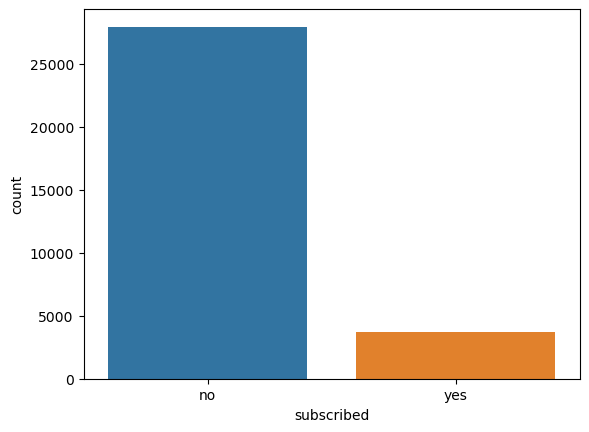

In [13]:
# visualize the subscribed using count plot
sns.countplot(data=train, x='subscribed')

In [14]:
# normalize the subscribed 
train['subscribed'].value_counts(normalize = True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

In [15]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

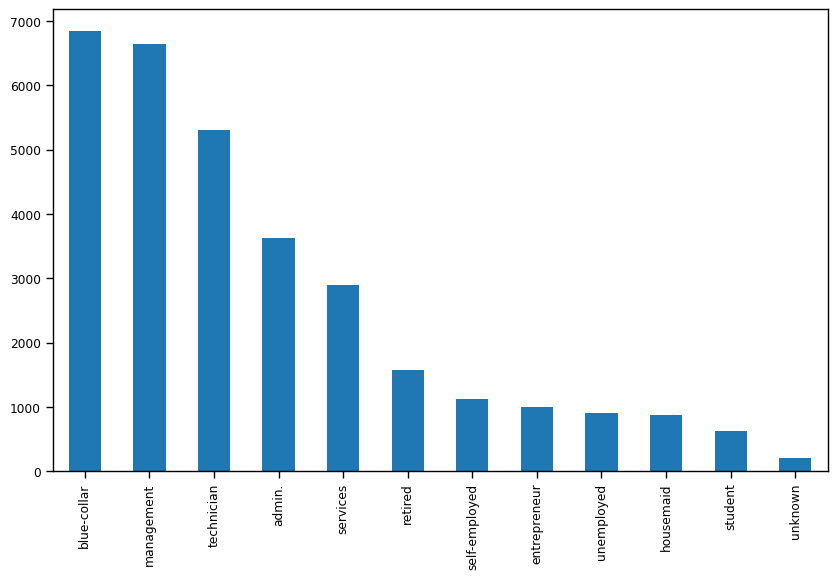

In [16]:
sns.set_context('paper')
train['job'].value_counts().plot(kind='bar', figsize=(10,6));

In [17]:
# similary marital count
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<Axes: xlabel='marital', ylabel='count'>

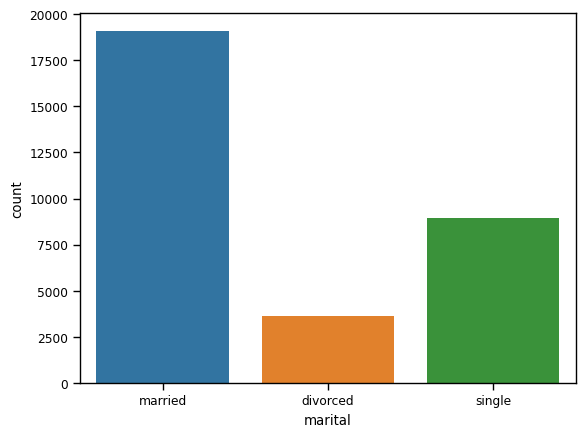

In [18]:
sns.countplot(data=train, x='marital')

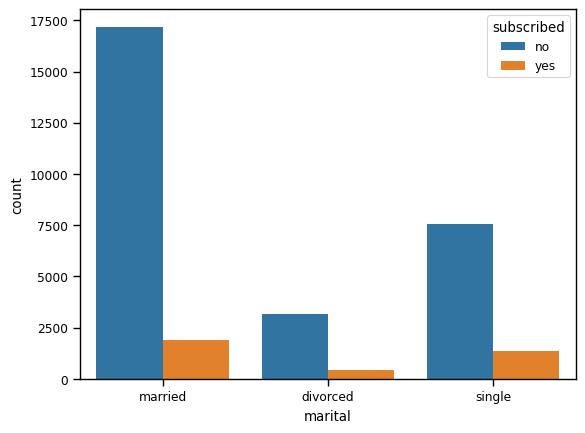

In [19]:
sns.countplot(data=train, x='marital', hue='subscribed');

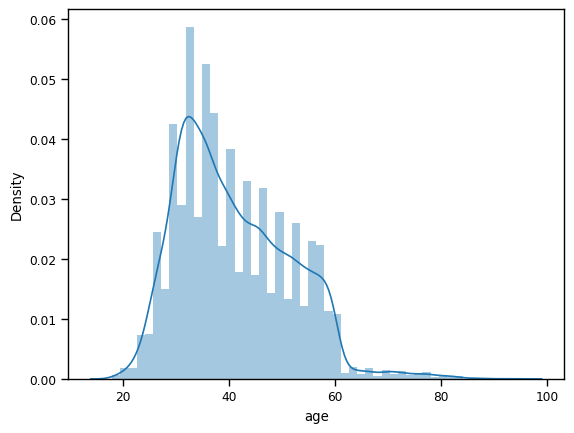

In [20]:
# check age using distplot
sns.distplot(train['age']);

In [21]:
# cross tab job vs subscribed 
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


In [22]:
job = pd.crosstab(train['job'],train['subscribed'])
job_norm = job.div(job.sum(1).astype(float),axis=0)

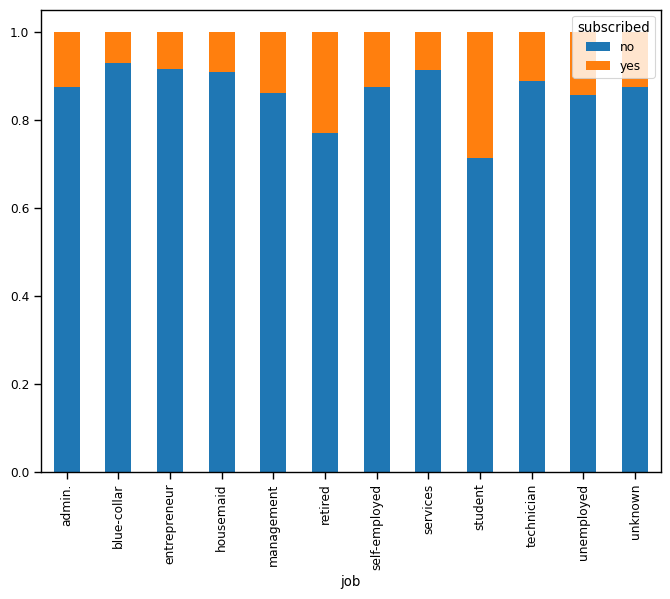

In [23]:
# cross tab job vs subscribed visualize using barplot
job_norm.plot.bar(stacked=True, figsize=(8,6));

In [24]:
# cross tab marital vs subscribed 
pd.crosstab(train['marital'], train['subscribed'])

subscribed,no,yes
marital,,
divorced,3185,445
married,17176,1919
single,7571,1351


In [25]:
marital = pd.crosstab(train['marital'], train['subscribed'])
mari_nor = marital.div(marital.sum(1).astype(float), axis=0)
mari_nor

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


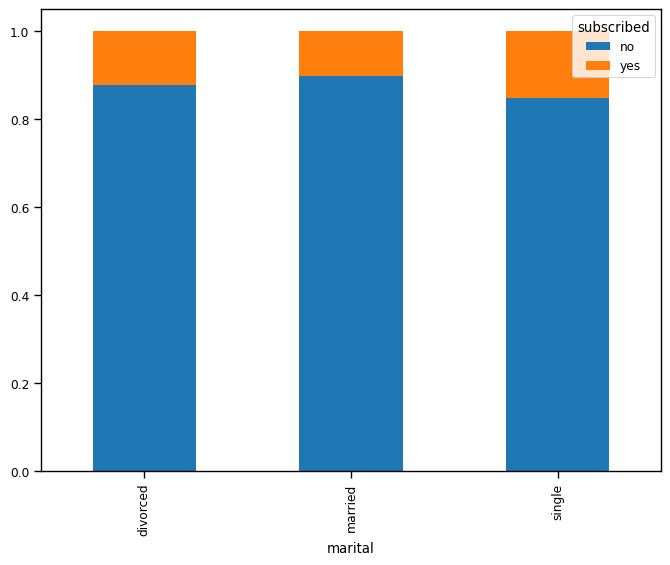

In [26]:
# cross tab marital vs subscribed visualise using barplot
mari_nor.plot.bar(stacked=True, figsize=(8,6));

In [27]:
# cross tab default vs subscribed 
pd.crosstab(train['default'], train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


In [28]:
df = pd.crosstab(train['marital'], train['subscribed'])
df_nor = marital.div(marital.sum(1).astype(float), axis=0)
df_nor

subscribed,no,yes
marital,,
divorced,0.877410,0.122590
married,0.899502,0.100498
single,0.848577,0.151423


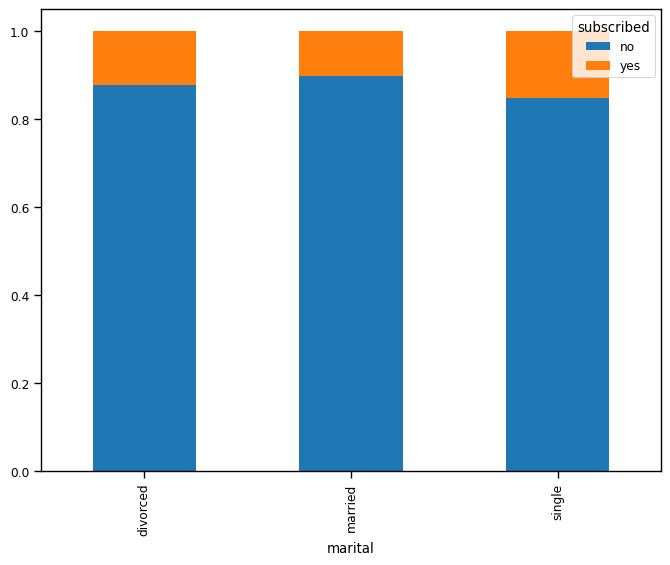

In [29]:
# # cross tab default vs subscribed visualise using barplot
df_nor.plot.bar(stacked=True, figsize=(8,6));

In [31]:
# subscribed convert string to number 
train['subscribed'].replace('no', 0 , inplace = True)
train['subscribed'].replace('yes', 1 , inplace = True)

In [32]:
train['subscribed']

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

In [33]:
# check the correlation 
tcor=train.corr()

In [34]:
tcor

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


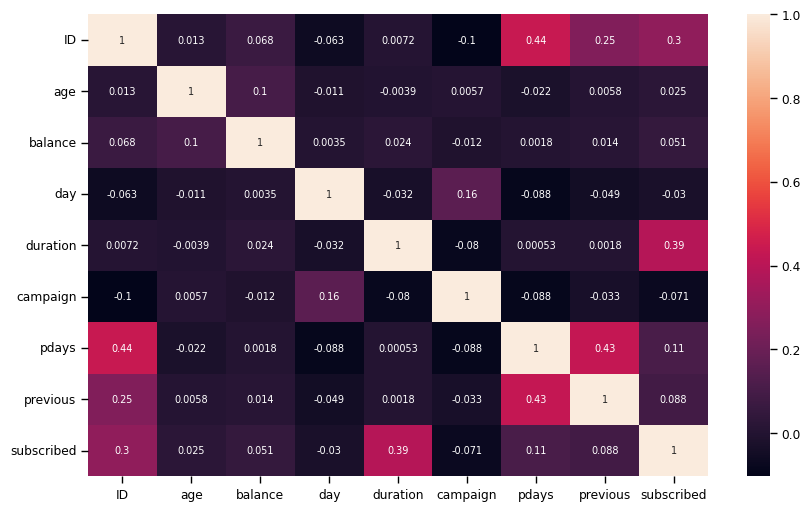

In [35]:
# visualise the correlation using heatmap

plt.figure(figsize=(10,6))
sns.heatmap(tcor, annot=True, annot_kws={'size':7})
plt.show()

In [37]:
# separating features and label

target = train['subscribed']
train = train.drop('subscribed', axis=1)

In [39]:
train=pd.get_dummies(train)
train.head

<bound method NDFrame.head of           ID  age  balance  day  duration  campaign  pdays  previous  \
0      26110   56     1933   19        44         2     -1         0   
1      40576   31        3   20        91         2     -1         0   
2      15320   27      891   18       240         1     -1         0   
3      43962   57     3287   22       867         1     84         3   
4      29842   31      119    4       380         1     -1         0   
...      ...  ...      ...  ...       ...       ...    ...       ...   
31642  36483   29        0   12       116         2     -1         0   
31643  40178   53      380    5       438         2     -1         0   
31644  19710   32      312    7        37         3     -1         0   
31645  38556   57      225   15        22         7    337        12   
31646  14156   55      204   11      1973         2     -1         0   

       job_admin.  job_blue-collar  ...  month_jun  month_mar  month_may  \
0               1            

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
# Creating the training and testing data sets

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=12)

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

In [44]:
# logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [45]:
lr.fit(X_train,y_train)

LogisticRegression()

In [47]:
pred = lr.predict(X_val)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
# check the accuracy of logistic regression

accuracy_score(y_val,pred)

0.8879936808846761

In [51]:

from sklearn.tree import DecisionTreeClassifier

In [52]:
# Decision Tree Classifier 

clf = DecisionTreeClassifier(max_depth=5, random_state=0)

In [53]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [54]:
predict = clf.predict(X_val)
predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
# check the accuracy of decision tree classifier 

accuracy_score(y_val,predict)

0.9063191153238547

In [83]:
# saving the model

import joblib
joblib.dump(clf, "BankMarketing.pkl")

['BankMarketing.pkl']

In [84]:
# Let's load the saved model and get the prediction 

model = joblib.load("BankMarketing.pkl")

# Prediction 

prediction = model.predict(X_val)
prediction

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [85]:
# compare actual vs predicted 

a = np.array(y_val)
data = pd.DataFrame()
data["Predicted"]=prediction
data["Original"]=a
data

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
6325,0,0
6326,0,0
6327,1,1
6328,0,0
